In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

[[0.9272006]]


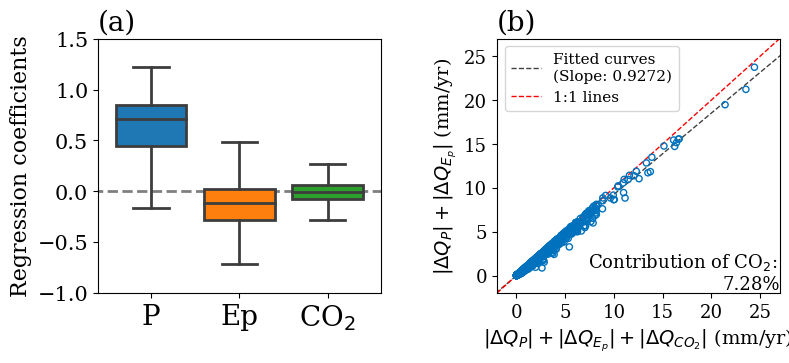

In [2]:
# Plot Figure S3
def Figure_S3():
    data = pd.read_csv(r"dataset\observation_based_approach_result.csv")
    fig = plt.figure(figsize=(8, 3.5))

    # Figure S3a dataset
    D = np.zeros((1116, 3))
    D[:, 0] = np.ravel(data['PET_FAO_YANG_par_P'])
    D[:, 1] = np.ravel(data['PET_FAO_YANG_par_Ep'])
    D[:, 2] = np.ravel(data['PET_FAO_YANG_par_CO2'])

    # Plot Figure S3a
    ax = fig.add_subplot(121)
    ax.plot([-1, 4], [0, 0], ls='--', c='k', linewidth=2, alpha=0.5, zorder=0)
    sns.boxplot(D, saturation=1, linewidth=2, showfliers=False, ax=ax, zorder=10)
    plt.xlim([-0.6, 2.6])
    plt.ylim([-1, 1.5])
    plt.xticks([0, 1, 2], ['P', 'Ep', 'CO$_2$'], family='serif', fontsize=20)
    plt.yticks(family='serif', fontsize=15)
    plt.ylabel('Regression coefficients', family='serif', fontsize=16)
    plt.title("(a)", loc='left', fontfamily='serif', fontsize=20)

    # Figure S3b dataset
    D = np.zeros((1116, 3))
    D[:, 0] = np.ravel(data['PET_FAO_YANG_P_contribution'])
    D[:, 1] = np.ravel(data['PET_FAO_YANG_Ep_contribution'])
    D[:, 2] = np.ravel(data['PET_FAO_YANG_CO2_contribution'])
    D1 = np.abs(D[:, 0]) + np.abs(D[:, 1])
    D2 = np.abs(D[:, 0]) + np.abs(D[:, 1]) + np.abs(D[:, 2])
    colorneed = ['#0072BD', '#D95319', '#EDB120', '#7E2F8E']

    # Plot Figure S3b
    ax = fig.add_subplot(122)
    regressor = LinearRegression()
    regressor = regressor.fit(np.reshape(D2, (-1, 1)), np.reshape(D1, (-1, 1)))
    ax.plot([-20, 30], regressor.predict(np.reshape([-20, 30], (-1, 1))),
            color='k', ls='--', lw=1, alpha=0.75, zorder=0, label='Fitted curves\n(Slope: 0.9272)')
    print(regressor.coef_)
    ax.plot([-2, 27], [-2, 27], ls='--', c='r', linewidth=1, alpha=1, zorder=0,
            label='1:1 lines')
    ax.text(27, -2, "Contribution of CO$_2$: \n" + str(np.round(100 - regressor.coef_[0][0] * 100, 2)) + "%",
            fontsize=13, family='serif',
            va='bottom', ha='right')
    ax.scatter(D2, D1, s=20, marker='o', linewidths=1, facecolor='None',
               edgecolor=colorneed[0])
    legend_font = {
        'family': 'serif',
        'style': 'normal',
        'size': 11,
        'weight': "normal",
    }
    plt.legend(prop=legend_font)
    plt.xlim([-2, 27])
    plt.ylim([-2, 27])
    plt.xticks(family='serif', fontsize=13)
    plt.yticks(family='serif', fontsize=13)
    plt.xlabel('$|\Delta Q_{P}|+|\Delta Q_{E_p}|+|\Delta Q_{CO_2}|$ (mm/yr)', family='serif', fontsize=14)
    plt.ylabel('$|\Delta Q_{P}|+|\Delta Q_{E_p}|$ (mm/yr)', family='serif', fontsize=14)
    plt.title("(b)", loc='left', fontfamily='serif', fontsize=20)

    plt.tight_layout()
    plt.subplots_adjust(
        top=0.901,
        bottom=0.174,
        left=0.129,
        right=0.981,
        hspace=0.215,
        wspace=0.411
    )
    plt.rcParams['savefig.dpi'] = 1000
    plt.show()

Figure_S3()

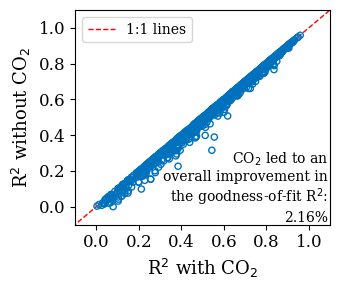

In [3]:
# Plot Figure S4
def Figure_S4():
    data = pd.read_excel(r"dataset\compare_CO2_have_or_not.xlsx")
    D1 = np.ravel(data['PET_FAO_YANG_R2_have_CO2'])
    D2 = np.ravel(data['PET_FAO_YANG_R2_no_CO2'])
    colorneed = ['#0072BD', '#D95319', '#EDB120', '#7E2F8E']
    fig = plt.figure(figsize=(3.5, 3))
    ax = fig.add_subplot(111)
    regressor = LinearRegression()
    regressor = regressor.fit(np.reshape(D1, (-1, 1)), np.reshape(D2, (-1, 1)))
    ax.plot([-2, 27], [-2, 27], ls='--', c='r', linewidth=1, alpha=1, zorder=0,
            label='1:1 lines')
    value = (np.mean(D1) - np.mean(D2))/np.mean(D2)
    ax.text(1.09, -0.1, "CO$_2$ led to an\noverall improvement in"
                        "\nthe goodness-of-fit R$^2$:\n" + str(np.round(100*value, 2)) + "%",
            fontsize=10, family='serif',
            va='bottom', ha='right')
    ax.scatter(D1, D2, s=20, marker='o', linewidths=1, facecolor='None',
               edgecolor=colorneed[0])
    legend_font = {'family': 'serif', 'style': 'normal', 'size': 10, 'weight': "normal"}
    plt.legend(prop=legend_font)
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], family='serif', fontsize=12)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], family='serif', fontsize=12)
    plt.xlabel('R$^2$ with CO$_2$', family='serif', fontsize=13)
    plt.ylabel('R$^2$ without CO$_2$', family='serif', fontsize=13)
    plt.tight_layout()
    plt.rcParams['savefig.dpi'] = 1000
    plt.show()
Figure_S4()

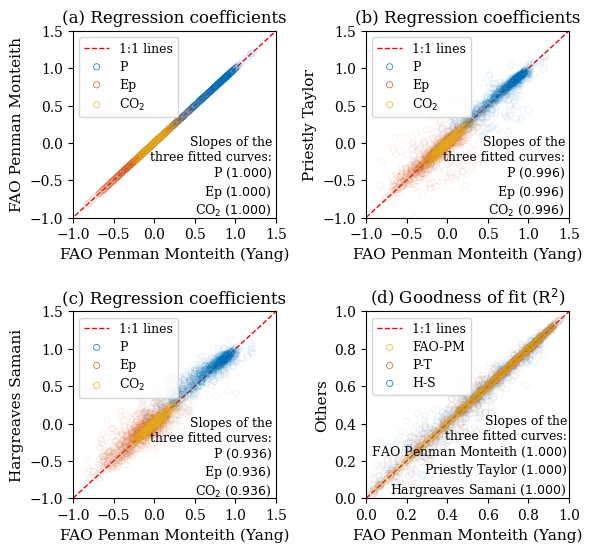

In [4]:
# Plot Figure S5
def Figure_S5():
    list_value = ['PET_FAO_par_P', 'PET_FAO_par_Ep', 'PET_FAO_par_CO2',
                  'PET_FAO_CO2_contribution', 'PET_FAO_P_contribution',
                  'PET_FAO_Ep_contribution', 'PET_FAO_Q_change', 'PET_FAO_obs',
                  'PET_FAO_YANG_par_P', 'PET_FAO_YANG_par_Ep',
                  'PET_FAO_YANG_par_CO2', 'PET_FAO_YANG_CO2_contribution',
                  'PET_FAO_YANG_P_contribution', 'PET_FAO_YANG_Ep_contribution',
                  'PET_FAO_YANG_Q_change', 'PET_FAO_YANG_obs',
                  'PET_PT_par_P', 'PET_PT_par_Ep', 'PET_PT_par_CO2',
                  'PET_PT_CO2_contribution', 'PET_PT_P_contribution', 'PET_PT_Ep_contribution',
                  'PET_PT_Q_change', 'PET_PT_obs',
                  'PET_HargreavesSamani_par_P', 'PET_HargreavesSamani_par_Ep',
                  'PET_HargreavesSamani_par_CO2', 'PET_HargreavesSamani_CO2_contribution',
                  'PET_HargreavesSamani_P_contribution', 'PET_HargreavesSamani_Ep_contribution',
                  'PET_HargreavesSamani_Q_change', 'PET_HargreavesSamani_obs']
    NAME = ['FAO Penman Monteith', 'FAO Penman Monteith (Yang)', 'Priestly Taylor', 'Hargreaves Samani']
    data = pd.read_csv(r"dataset\observation_based_approach_result.csv")
    k = 1
    DP1 = np.ravel(data[list_value[8 * k + 0]])
    DE1 = np.ravel(data[list_value[8 * k + 1]])
    DC1 = np.ravel(data[list_value[8 * k + 2]])
    colorneed = ['#0072BD', '#D95319', '#EDB120', '#7E2F8E']
    L = ['(a) Regression coefficients', '(b) Regression coefficients',
         '(c) Regression coefficients', '(d) Goodness of fit (R$^2$)']
    fig = plt.figure(figsize=(6, 5.5))
    s = 1
    for k in [0, 2, 3]:
        DP2 = np.ravel(data[list_value[8 * k + 0]])
        DE2 = np.ravel(data[list_value[8 * k + 1]])
        DC2 = np.ravel(data[list_value[8 * k + 2]])
        ax = fig.add_subplot(2, 2, s)
        s = s+1
        regressor = LinearRegression()
        regressor1 = regressor.fit(np.reshape(DP1, (-1, 1)), np.reshape(DP2, (-1, 1)))
        regressor2 = regressor.fit(np.reshape(DE1, (-1, 1)), np.reshape(DE2, (-1, 1)))
        regressor3 = regressor.fit(np.reshape(DC1, (-1, 1)), np.reshape(DC2, (-1, 1)))

        alpha = 0.1
        ax.plot([-2, 27], [-2, 27], ls='--', c='r', linewidth=1, alpha=1, zorder=0,
                label='1:1 lines')
        ax.scatter(DP1, DP2, s=20, marker='o', linewidths=0.5, facecolor='None',
                   edgecolor=colorneed[0], alpha=alpha)
        ax.scatter(DE1, DE2, s=20, marker='o', linewidths=0.5, facecolor='None',
                   edgecolor=colorneed[1], alpha=alpha)
        ax.scatter(DC1, DC2, s=20, marker='o', linewidths=0.5, facecolor='None',
                   edgecolor=colorneed[2], alpha=alpha)
        ax.text(1.45, -1, "Slopes of the\nthree fitted curves:\nP ($%.3f$)\nEp ($%.3f$)\nCO$_2$ ($%.3f$) "
                %(regressor1.coef_[0][0], regressor2.coef_[0][0], regressor3.coef_[0][0]),
                fontsize=9, family='serif',
                va='bottom', ha='right')
        ax.set_title(L[s-2], fontsize=12, family='serif',)
        ax.scatter(-999, -999, s=20, marker='o', linewidths=0.5, facecolor='None',
                   edgecolor=colorneed[0], label='P')
        ax.scatter(-999, -999, s=20, marker='o', linewidths=0.5, facecolor='None',
                   edgecolor=colorneed[1], label='Ep')
        ax.scatter(-999, -999, s=20, marker='o', linewidths=0.5, facecolor='None',
                   edgecolor=colorneed[2], label='CO$_2$')
        legend_font = { 'family': 'serif', 'style': 'normal', 'size': 9, 'weight': "normal"}
        plt.legend(prop=legend_font, labelspacing=0.4, loc='upper left')
        plt.xlim([-1, 1.5])
        plt.ylim([-1, 1.5])
        plt.xticks([-1, -0.5, 0, 0.5, 1.0, 1.5], family='serif', fontsize=10)
        plt.yticks([-1, -0.5, 0, 0.5, 1.0, 1.5], family='serif', fontsize=10)
        plt.xlabel(NAME[1], family='serif', fontsize=11)
        plt.ylabel(NAME[k], family='serif', fontsize=11)

    ax = fig.add_subplot(2, 2, s)
    D1 = np.ravel(data['PET_FAO_R2'])
    D2 = np.ravel(data['PET_FAO_YANG_R2'])
    D3 = np.ravel(data['PET_PT_R2'])
    D4 = np.ravel(data['PET_HargreavesSamani_R2'])
    regressor = LinearRegression()
    regressor1 = regressor.fit(np.reshape(D2, (-1, 1)), np.reshape(D4, (-1, 1)))
    regressor2 = regressor.fit(np.reshape(D2, (-1, 1)), np.reshape(D3, (-1, 1)))
    regressor3 = regressor.fit(np.reshape(D2, (-1, 1)), np.reshape(D1, (-1, 1)))
    alpha = 0.1
    ax.plot([-2, 27], [-2, 27], ls='--', c='r', linewidth=1, alpha=1, zorder=0,
            label='1:1 lines')
    ax.scatter(D2, D4, s=20, marker='o', linewidths=0.5, facecolor='None',
               edgecolor=colorneed[0], alpha=alpha)
    ax.scatter(D2, D3, s=20, marker='o', linewidths=0.5, facecolor='None',
               edgecolor=colorneed[1], alpha=alpha)
    ax.scatter(D2, D1, s=20, marker='o', linewidths=0.5, facecolor='None',
               edgecolor=colorneed[2], alpha=alpha)
    ax.text(0.99, 0, "Slopes of the\nthree fitted curves:\n FAO Penman Monteith ($%.3f$)\n"
                      "Priestly Taylor ($%.3f$)\nHargreaves Samani ($%.3f$) "
            % (regressor1.coef_[0][0], regressor2.coef_[0][0], regressor3.coef_[0][0]),
            fontsize=9, family='serif',
            va='bottom', ha='right')
    ax.set_title(L[-1], fontsize=12, family='serif', )
    ax.scatter(-999, -999, s=20, marker='o', linewidths=0.5, facecolor='None',
               edgecolor=colorneed[2], label='FAO-PM')
    ax.scatter(-999, -999, s=20, marker='o', linewidths=0.5, facecolor='None',
               edgecolor=colorneed[1], label='P-T')
    ax.scatter(-999, -999, s=20, marker='o', linewidths=0.5, facecolor='None',
               edgecolor=colorneed[0], label='H-S')
    legend_font = { 'family': 'serif', 'style': 'normal', 'size': 9, 'weight': "normal"}
    plt.legend(prop=legend_font, labelspacing=0.4)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], family='serif', fontsize=10)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], family='serif', fontsize=10)
    plt.xlabel(NAME[1], family='serif', fontsize=11)
    plt.ylabel('Others', family='serif', fontsize=11)


    plt.tight_layout()
    plt.subplots_adjust(
        top=0.95,
        bottom=0.1,
        left=0.13,
        right=0.957,
        hspace=0.502,
        wspace=0.442
    )
    plt.rcParams['savefig.dpi'] = 1000
    plt.show()
Figure_S5()